# Random walk on a triangulation of the sphere

In [1]:
from numpy import *
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


## Data structure
- edges are numbered from 1 to 12
- vertices from 0 to 5
- triangles are sets of 3 edges



- Point 0 is [1,0,0]
- Point 1 is [0,1,0]
- Point 2 is [-1,0,0]
- Point 3 is [0,-1,0]
- Point 4 is North Pole
- Point 5 is South Pole
- Edge 1 is 01, 2 is 12, 3 is 23, 4 is 03, 5 is 04, 6 is 14, 7 is 24, 8 is 34, 9 is 05, etc.

The function _expon_ keeps track of the time spent in each state. If it returns $1$, it means we are considering the DTMC, otherwise the CTMC (see the 3rd parameter of _simul_). The degree of a path is the number of adjacent triangles counted with multiplicity, i.e. twice its length. The 4th parameter of _simul_ is True or False to activate or not the picture of the paths along the simulation.

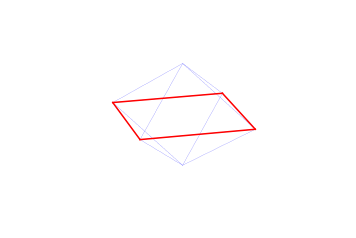

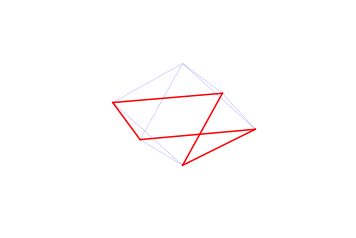

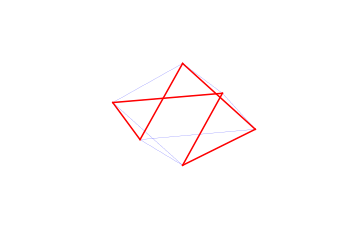

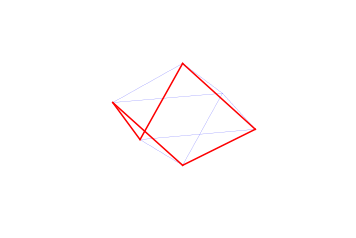

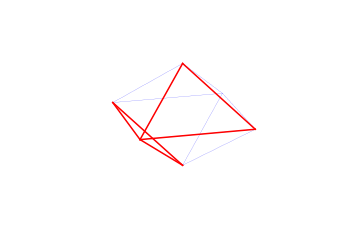

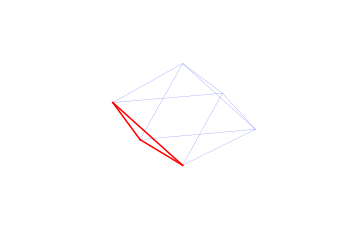

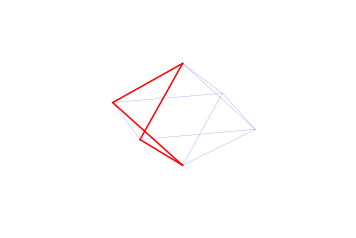

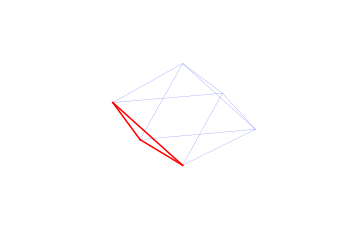

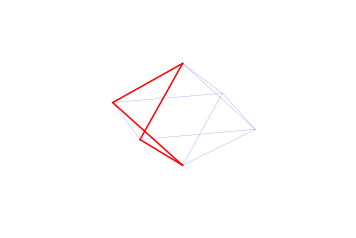

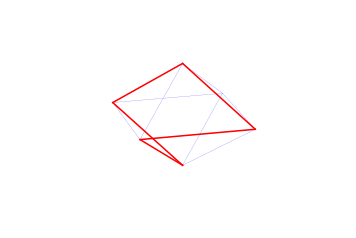

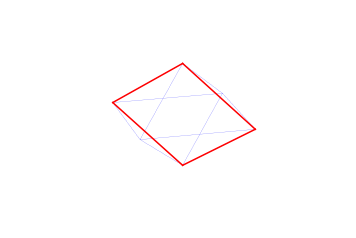

([{1, 2, 3, 4},
  {2, 3, 4, 9, 10},
  {2, 3, 5, 8, 9, 10},
  {3, 5, 8, 9, 11},
  {3, 4, 5, 8, 11, 12},
  {3, 11, 12},
  {7, 8, 11, 12},
  {4, 5, 7, 11, 12},
  {5, 7, 9, 11}],
 [1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0])

In [2]:
def plt_chemin(chem):
    points_=np.zeros((6,3))
    points_[0,0]=1
    points_[1,1]=1
    points_[2,0]=-1
    points_[3,1]=-1
    points_[4,2]=1
    points_[5,2]=-1
    edges_=[[0,1],[1,2],[2,3],[0,3],[0,4],[1,4],[2,4],[3,4],[0,5],[1,5],[2,5],[3,5]]
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.grid(b=False)
    ax.set_axis_off()
    for e_ in edges_:
        ax.plot([points_[e_[0],0],points_[e_[1],0]],[points_[e_[0],1],points_[e_[1],1]],[points_[e_[0],2],points_[e_[1],2]],color='blue',ls='dashed',lw=0.2)
    l_chem=list(chem)
    l_chem=l_chem + [l_chem[0]]
    for n in np.arange(len(l_chem)-1):
        edge=edges_[l_chem[n]-1]      
        ax.plot([points_[edge[0],0],points_[edge[1],0]],[points_[edge[0],1],points_[edge[1],1]],[points_[edge[0],2],points_[edge[1],2]],color='red')
    plt.show()

#def adjacentTriangles(path):
#    l=[]
#    for e in path:
#        for x in graphe:
#            if x != path:
#                if e in x:
#                    l+=[x]
#    return l

def adjacentTriangles(path):
    l=[]
    for e in path:
        for x in graphe:
            if x != path:
                if e in x:
                    l+=[x]
    return l



def rw(path):
    adjTr=adjacentTriangles(path)
    tr=adjTr[np.random.randint(len(adjTr))]
    return path.symmetric_difference(tr)

def expon(chem_,type_):
    if type_=='DTMC':
        return 1.
    else:
        return -np.log(np.random.rand())/2./len(chem_)

def simul(chem,N,type_,draw_):
    cycles=[chem]
    weights=[expon(chem,type_)]
    if draw_:
        plt_chemin(chem)
    #print(cycles)
    for i in range(N):
        #print(cycles)
        nv_chem=rw(chem.copy())
        if nv_chem in cycles:
            weights[cycles.index(nv_chem)]+=expon(nv_chem,type_)
        else:
            cycles.append(nv_chem)
            weights.append(expon(nv_chem,type_))
        #print(cycles)
        #print(weights)
        #print("----\n")
        chem=nv_chem
        if draw_:
            plt_chemin(chem)
    return cycles,weights

graphe=[{1,5,6},{2,6,7},{3,7,8},{4,5,8},{1,9,10},{2,10,11},{3,11,12},{4,9,12}]
chemin={1,2,3,4}

simul(chemin,10,'DTMC',draw_=True)


### Without hole
- The stationary probability of a _path_ is proportional to its degree
- The stationary distribution is uniform over _edges_

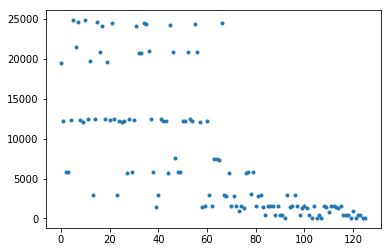

[{1, 2, 4, 5, 6, 9, 10, 11, 12} {1, 2, 3, 5, 6, 7, 8, 10, 11}
 {1, 2, 4, 5, 6, 7, 8, 9, 10} {1, 3, 4, 5, 6, 7, 8, 9, 12}
 {1, 2, 3, 6, 7, 9, 10, 11, 12} {2, 3, 4, 7, 8, 9, 10, 11, 12}
 {2, 3, 4, 5, 6, 7, 8, 11, 12} {1, 3, 4, 5, 8, 9, 10, 11, 12}
 {2, 3, 5, 6, 7, 8, 9, 11} {1, 2, 5, 6, 7, 8, 10, 12}
 {1, 2, 3, 4, 7, 8, 11, 12} {1, 2, 3, 4, 5, 6, 9, 10}
 {1, 2, 6, 8, 9, 10, 11, 12} {1, 4, 5, 7, 9, 10, 11, 12}
 {2, 3, 5, 7, 9, 10, 11, 12} {1, 2, 3, 4, 5, 8, 9, 12}
 {1, 2, 3, 4, 6, 7, 10, 11} {1, 4, 5, 6, 7, 8, 9, 11}
 {3, 4, 5, 6, 7, 8, 10, 12} {3, 4, 6, 8, 9, 10, 11, 12}
 {1, 2, 3, 4, 5, 7, 9, 11} {1, 2, 3, 4, 6, 8, 10, 12}
 {5, 6, 7, 8, 9, 10, 11, 12} {2, 4, 6, 7, 9, 12} {2, 4, 5, 8, 10, 11}
 {1, 3, 5, 6, 11, 12} {1, 3, 7, 8, 9, 10} {2, 3, 4, 6, 8, 9, 12}
 {2, 3, 4, 5, 8, 10, 12} {1, 2, 3, 7, 8, 9, 11} {2, 3, 4, 5, 7, 10, 11}
 {1, 2, 3, 5, 6, 10, 12} {1, 2, 4, 6, 8, 10, 11} {1, 7, 8, 9, 10, 11, 12}
 {4, 6, 7, 9, 10, 11, 12} {1, 5, 6, 7, 8, 11, 12} {2, 5, 6, 7, 8, 9, 12}
 {1, 3, 4, 5, 6,

In [3]:
graphe=[{1,5,6},{2,6,7},{3,7,8},{4,5,8},{1,9,10},{2,10,11},{3,11,12},{4,9,12}]
chemin={1,2,3,4}



cycle,poids=simul(chemin,1000000,'DTMC',draw_=False)
plt.plot(np.arange(len(poids)),poids,'.')
plt.show()
u=np.argsort(poids)
print(np.asarray(cycle)[u])

poids_aretes=np.zeros(12)
for i,x in enumerate(poids):
    for j,a in enumerate(cycle[i]):
        poids_aretes[a-1]+=x
        
poids_total=np.sum(poids_aretes)
for i in np.arange(12):
    print(i+1,poids_aretes[i]/poids_total)
    
    

### With a hole

The frequency of the edges which are close to the hole is slightly less than the frequency of _regular_ edges.

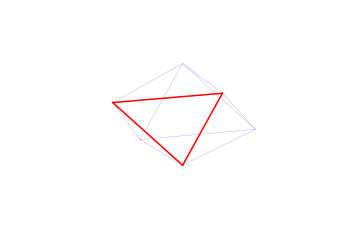

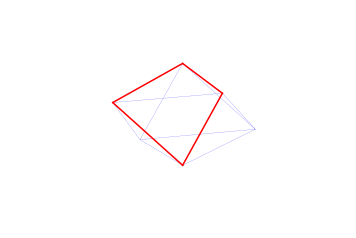

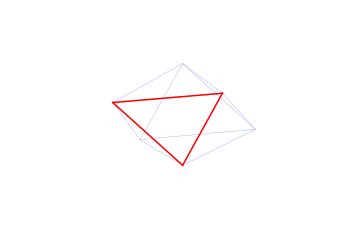

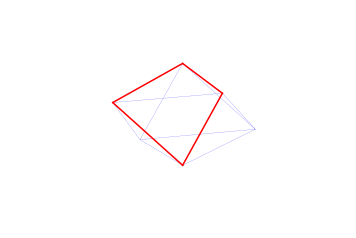

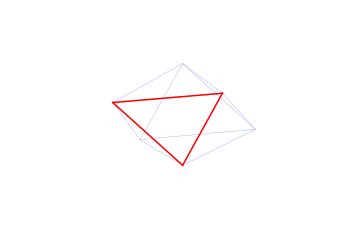

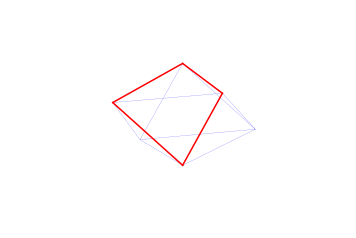

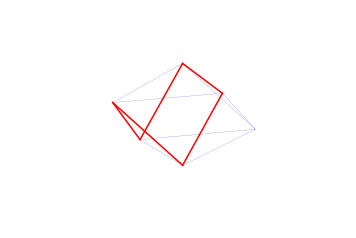

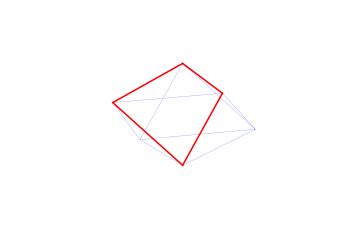

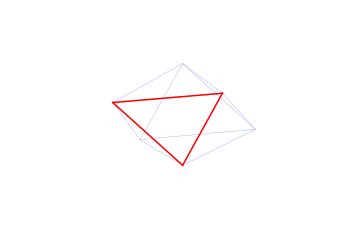

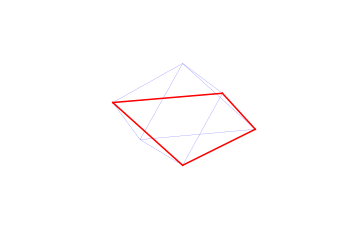

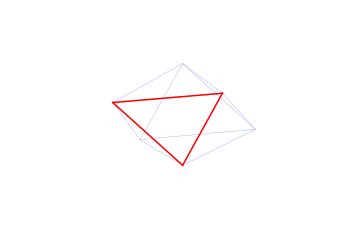

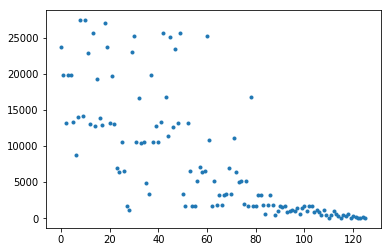

[{1, 2, 4, 5, 6, 7, 8, 9, 10} {1, 3, 4, 5, 8, 9, 10, 11, 12}
 {2, 3, 4, 5, 6, 7, 8, 11, 12} {1, 2, 3, 5, 6, 7, 8, 10, 11}
 {1, 2, 4, 5, 6, 9, 10, 11, 12} {1, 3, 4, 5, 6, 7, 8, 9, 12}
 {2, 3, 4, 7, 8, 9, 10, 11, 12} {1, 2, 3, 6, 7, 9, 10, 11, 12}
 {1, 2, 3, 4, 5, 6, 9, 10} {1, 4, 5, 7, 9, 10, 11, 12}
 {1, 2, 3, 4, 7, 8, 11, 12} {2, 3, 5, 6, 7, 8, 9, 11}
 {1, 2, 5, 6, 7, 8, 10, 12} {3, 4, 6, 8, 9, 10, 11, 12}
 {1, 4, 5, 6, 7, 8, 9, 11} {1, 2, 3, 4, 5, 8, 9, 12}
 {3, 4, 5, 6, 7, 8, 10, 12} {1, 2, 6, 8, 9, 10, 11, 12}
 {2, 3, 5, 7, 9, 10, 11, 12} {1, 2, 3, 4, 6, 7, 10, 11}
 {5, 6, 7, 8, 9, 10, 11, 12} {1, 2, 3, 4, 6, 8, 10, 12}
 {1, 2, 3, 4, 5, 7, 9, 11} {3, 5, 6, 9, 10, 11, 12}
 {1, 2, 4, 6, 7, 10, 12} {2, 3, 4, 6, 7, 9, 11} {1, 7, 8, 9, 10, 11, 12}
 {1, 2, 3, 5, 7, 11, 12} {1, 2, 3, 6, 8, 9, 10} {1, 3, 7, 8, 9, 10}
 {1, 3, 5, 6, 11, 12} {2, 4, 6, 7, 9, 12} {4, 5, 6, 7, 8, 10, 11}
 {1, 2, 4, 5, 8, 9, 11} {2, 3, 4, 5, 8, 10, 12} {2, 3, 4, 6, 8, 9, 12}
 {1, 3, 4, 7, 8, 10, 12} {1, 3, 4, 5, 

In [4]:
graphe=[{1,5,6},{2,6,7},{3,7,8},{4,5,8},{1,9,10},{3,11,12},{4,9,12}]
chemin={2,10,11}

simul(chemin,10,'DTMC',draw_=True)

cycle,poids=simul(chemin,1000000,'DTMC',draw_=False)
plt.plot(np.arange(len(poids)),poids,'.')
plt.show()
u=np.argsort(poids)
print(np.asarray(cycle)[u])

poids_aretes=np.zeros(12)
for i,x in enumerate(poids):
    for j,a in enumerate(cycle[i]):
        poids_aretes[a-1]+=x
        
poids_total=np.sum(poids_aretes)
for i in np.arange(12):
    print(i+1,poids_aretes[i]/poids_total)

In [4]:
 adjacentTriangles({1,5,6,7})

[{1, 5, 6},
 {1, 9, 10},
 {1, 5, 6},
 {4, 5, 8},
 {1, 5, 6},
 {2, 6, 7},
 {2, 6, 7},
 {3, 7, 8}]